In [3]:
import sys
sys.path.append('../interfacemaster/')

In [4]:
from interfacemaster.cellcalc import get_primitive_hkl, get_pri_vec_inplane, get_normal_index, get_normal_from_MI
from interfacemaster.interface_generator import core, print_near_axis, convert_vector_index
from numpy import array, dot, round, cross
from numpy.linalg import inv, det

In [5]:
#https://aip.scitation.org/doi/full/10.1063/1.3489687

In [6]:
my_interface = core('cif_files/Li10Ge(PS6)2_mp-696138_conventional_standard.cif',\
                    'cif_files/Li10Ge(PS6)2_mp-696138_conventional_standard.cif')

Warning!, this programme will rewrite the POSCAR file in this dir!


# Get the two axis aligned to be collinear, expressed in primitive cell

In [50]:
hkl_2

array([1, 7, 0])

In [7]:
hkl_1 = get_primitive_hkl([-1, 7, 0], my_interface.conv_lattice_1, my_interface.lattice_1)
hkl_2 = get_primitive_hkl([1, 7, 0], my_interface.conv_lattice_2, my_interface.lattice_2)

# Searching two_dimensional CSL

In [38]:
my_interface.parse_limit(du = 2e-2, S  = 2e-2, sgm1=6, sgm2=6, dd = 2e-2)

#Do searching!
my_interface.search_one_position_2D(hkl_1, hkl_2, theta_range = 180, \
                                    dtheta = 0.01, start = 0)

[-1.85355612 12.54990398  0.2836026 ] [ -1.97653938 -12.56747301  -0.31245767]
[-0.1461106   0.98926826  0.        ] [-1.45910692e-01 -9.89297766e-01  7.87869178e-18]
Congrates, we found an appx CSL!

U1 = 
[[0 7]
 [0 1]
 [1 0]]; sigma_1 = 7

U2 = 
[[ 0 -7]
 [ 0  1]
 [ 1  0]]; sigma_2 = 7

D = 
[[ 9.9889324e-01 -1.6346000e-04 -1.7783010e-02]
 [-1.6346000e-04  9.9997586e-01 -2.6264700e-03]
 [-4.1765000e-03 -6.1685000e-04  9.9983842e-01]]

axis = [-16.44876225 111.369322     0.        ] ; theta = 1.03



# Get bicrystal

In [51]:
my_interface.bicrystal_U2

array([[-9.73340232e-18,  1.07223155e-35, -7.00000000e+00],
       [-1.00000000e+00,  2.82044017e-35,  1.00000000e+00],
       [-6.29363803e-18,  1.00000000e+00,  7.45663649e-18]])

In [40]:
my_interface.compute_bicrystal_two_D(hkl_1 = hkl_1, hkl_2=hkl_2, normal_ortho = False, plane_ortho = False, lim = 50, tol = 1e-2)

[[ 0.         60.08381845]
 [ 0.          8.87411746]
 [12.97496188 -0.98181799]]
[[ 7.52885897e-19  6.00838185e+01]
 [-3.74532296e-18  8.87411746e+00]
 [ 1.29749619e+01 -9.81817992e-01]]


In [27]:
my_interface.get_bicrystal(two_D = True, xyz_1 = [1,1,1], xyz_2 = [1,1,1])

[[ 8.87954092e+00 -4.49233063e-01  8.61811237e+00]
 [-4.09110101e-17  1.29671826e+01 -6.83842454e-01]
 [ 5.06268421e-18 -3.51472242e-19  6.01251999e+01]]


Please check the POSCAR file

# Different terminating planes

There exist some choices of terminating planes of both slabs,
we can directly see these planes here

In [21]:
#lattice plane spacing of the two slabs
my_interface.d1, my_interface.d2

(3.5136362263385323, 1.644551240000001)

In [22]:
my_interface.dp_list_1, my_interface.dp_list_2

([0.6810449053541383,
  1.0393449053541381,
  1.7567449053541377,
  2.474244905354139,
  2.832444905354139],
 [0.0, 1.6445])

Lattice 1 has 5 terminating planes while lattice 2 has only one

saving high resolution figure will take some time...please wait for a while :D


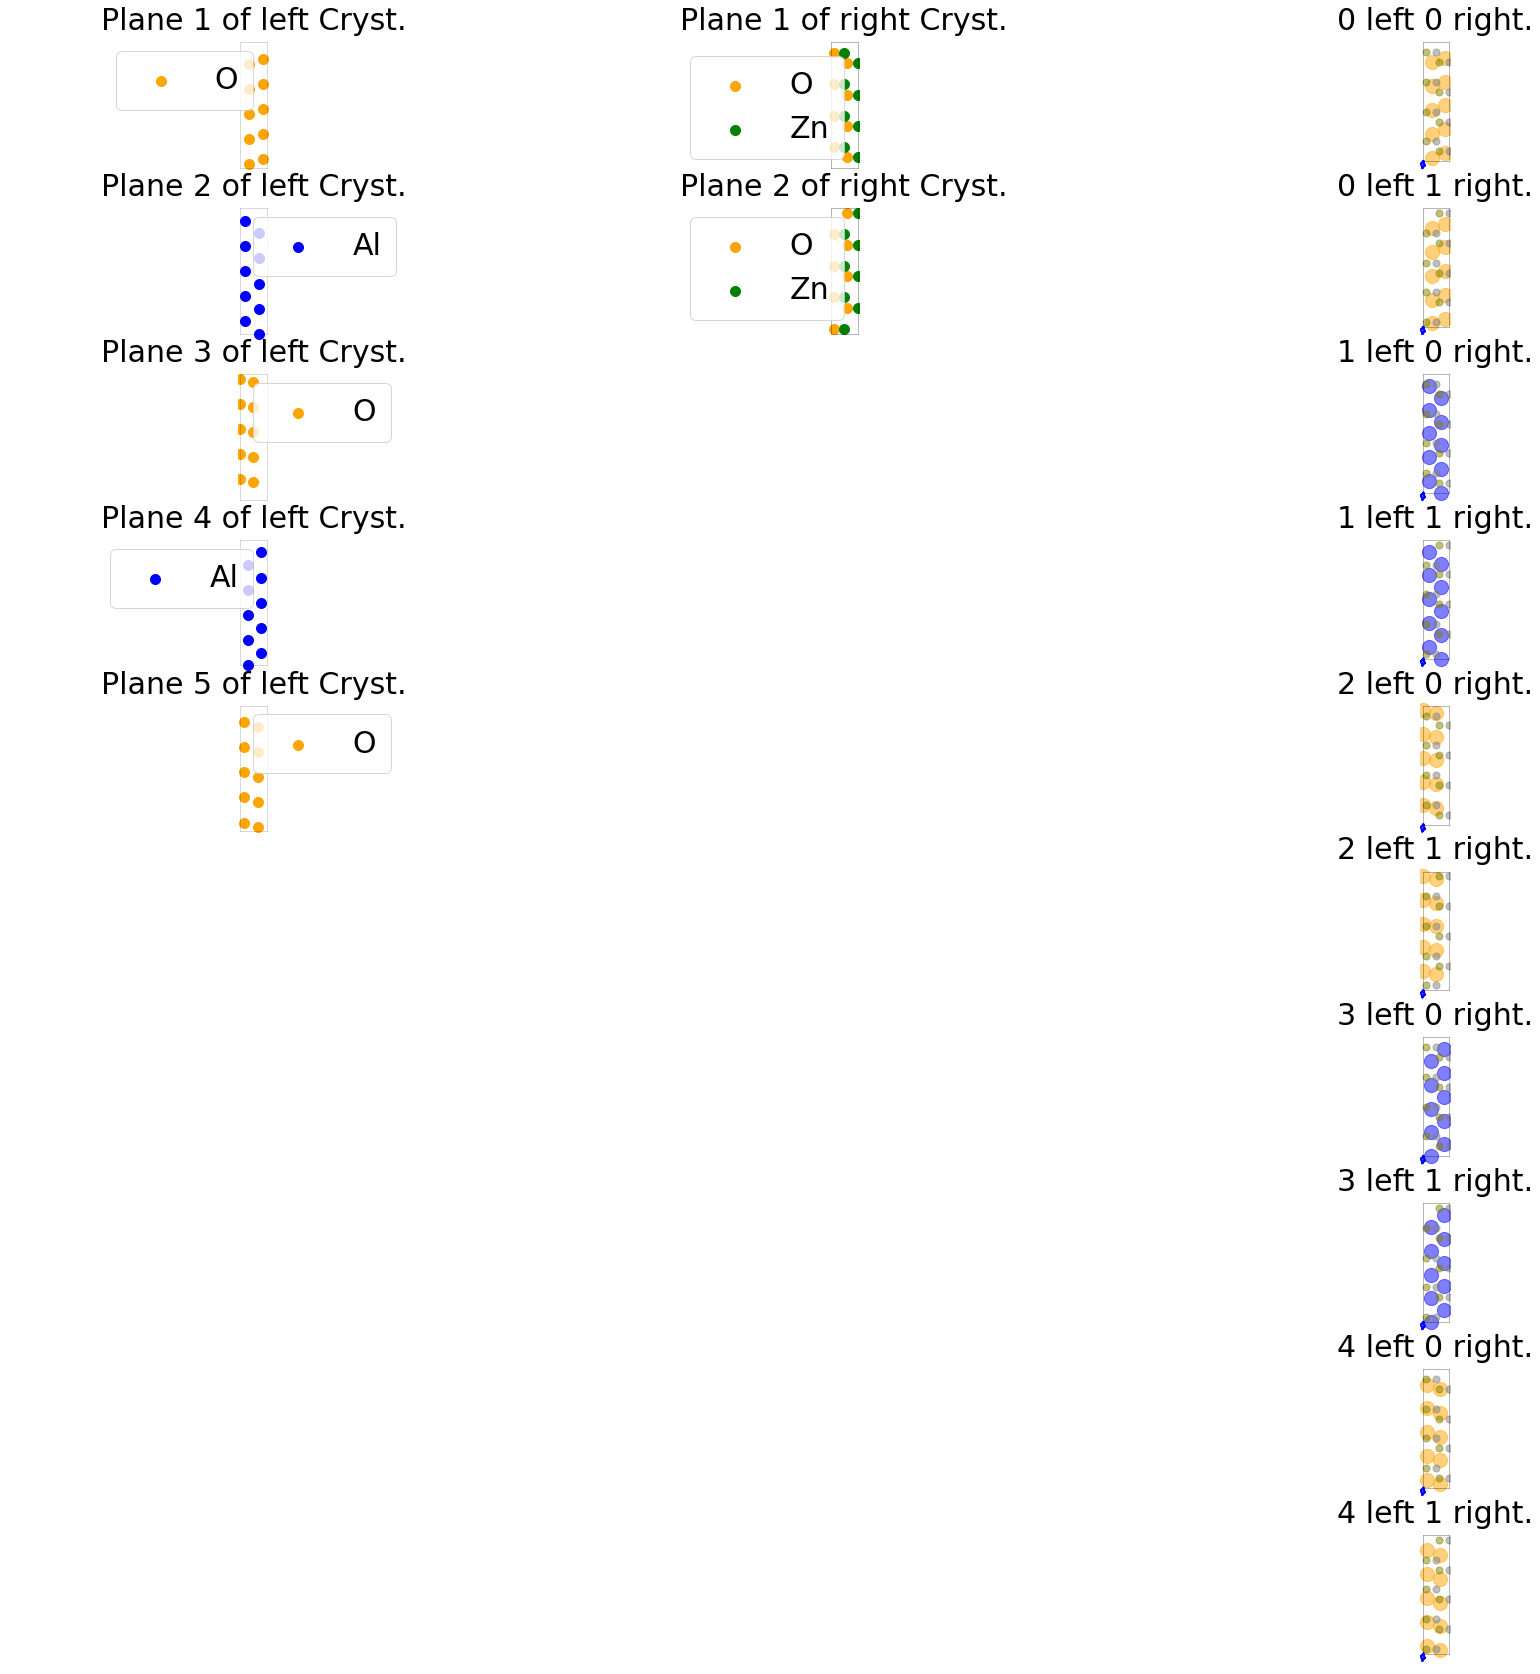

In [20]:
my_interface.draw_terminations(figuresize = (30,30), \
                               figuredpi = 100, legendsize = 30, titlesize = 30)

Please check the new POSCAR file again and you can find that the termination of lattice 1 has shifted to the second plane in the list.